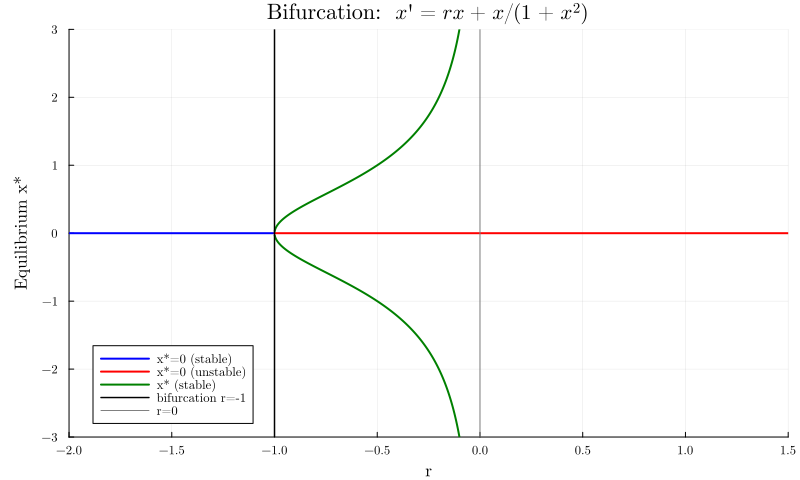

In [6]:
using Plots, LaTeXStrings

# Bifurcation diagram for: x' = r*x + x/(1 + x^2)
# Equilibria:
#   x* = 0                      (all r)
#   x* = ±sqrt(-1/r - 1)        (only for -1 < r < 0)
#
# Stability:
#   x*=0 is stable if r < -1, unstable if r > -1
#   x*=±sqrt(-1/r - 1) are stable whenever they exist (-1 < r < 0)

rmin, rmax = -2.0, 1.5
p = plot(; xlabel = "r", ylabel = "Equilibrium x*",
          title = "Bifurcation:  "*L"x' = r x + x/(1+x^2)",
          legend = :bottomleft, size=(800,480), fontfamily="Computer Modern",
          xlim=(rmin, rmax), ylim=(-3, 3), leftmargin=5Plots.mm)

# --- x* = 0 branch ---
if rmin < -1
    r0_stable = range(rmin, -1.0; length=400)
    plot!(p, collect(r0_stable), zeros(length(r0_stable)); label="x*=0 (stable)", color=:blue, linewidth=2)
end
if rmax > -1
    r0_unstable = range(-1.0, rmax; length=400)
    plot!(p, collect(r0_unstable), zeros(length(r0_unstable)); label="x*=0 (unstable)", color=:red, linewidth=2)
end

# --- side branches: x* = ±sqrt(-1/r - 1), for -1 < r < 0 ---
eps = 1e-3
r_side = range(-1.0 + eps, -eps; length=800) |> collect
x_side = sqrt.(-1.0 ./ r_side .- 1.0)

# upper and lower stable branches


plot!(p, r_side,  x_side; label="x* (stable)", color=:green, linewidth=2)
plot!(p, r_side, -x_side; label="",           color=:green, linewidth=2)

# Guide lines (use vline!/hline! to avoid scalar issues)
vline!(p, [-1.0]; label="bifurcation r=-1", color=:black, linewidth=1.5)
vline!(p, [0.0];  label="r=0",              color=:gray,  linewidth=1)

display(p)


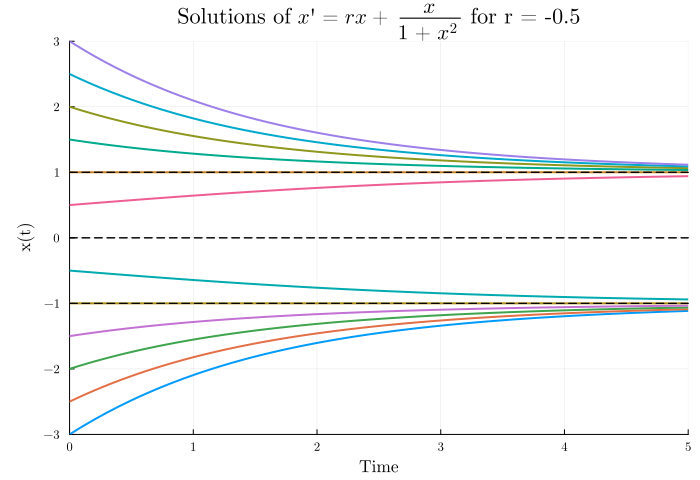

In [15]:
using DifferentialEquations
using Plots, LaTeXStrings

# ODE function
function ode!(du, u, p, t)
    r = p[1]
    du[1] = r*u[1] + u[1]/(1 + u[1]^2)
end

# Solve for different ICs
ics3 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)  

# Solve for each IC
sols3 = [solve(ODEProblem(ode!, [u0], tspan, [-0.5]), Tsit5(); saveat=t) for u0 in ics3]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx + \frac{x}{1+x^2}"*" for r = -0.5",
    legend=false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 3),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols3)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics3[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-1, -1]; color=:black, linestyle=:dash, label="x=-1")
hline!(plt, [0, 20], [1, 1]; color=:black, linestyle=:dash, label="x=1")
display(plt)
